In [1]:
import os
import sys

# Data science packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Learn utility classes & functions
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Scikit Learn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor,
                              RandomForestRegressor)
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor

PROJECT_PATH = os.path.abspath(os.path.join(os.getcwd(), '../'))

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)
    
from src.data.player_data import player_data, STATS_COLS
from src.model.metrics import measure_estimators, regression_accuracy

np.random.seed(42)

In [2]:
match_df = player_data()
match_df

/usr/local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
/usr/local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Returning data from 1965-01-01 to 2016-12-31

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Finished getting afltables data

  warnings.warn(x, RRuntimeWarning)


team  year  round_number  \
team             year round_number                                         
Adelaide         1991 1                     Adelaide  1991             1   
                      2                     Adelaide  1991             2   
                      3                     Adelaide  1991             3   
                      4                     Adelaide  1991             4   
                      5                     Adelaide  1991             5   
                      6                     Adelaide  1991             6   
                      7                     Adelaide  1991             7   
                      9                     Adelaide  1991             9   
                      10                    Adelaide  1991            10   
                      11                    Adelaide  1991            11   
                      12                    Adelaide  1991            12   
                      13                    Adelaide  1991            13   
                      14                    Adelaide  1991            14   
                      15                    Adelaide  1991            15   
                      16                    Adelaide  1991            16   
                      17                    Adelaide  1991            17   
                      18                    Adelaide  1991            18   
                      19                    Adelaide  1991            19   
                      20                    Adelaide  1991            20   
                      21                    Adelaide  1991            21   
                      22                    Adelaide  1991            22   
                      24                    Adelaide  1991            24   
                 1992 1                     Adelaide  1992             1   
                      3                     Adelaide  1992             3   
                      4                     Adelaide  1992             4   
                      5                     Adelaide  1992             5   
                      6                     Adelaide  1992             6   
                      7                     Adelaide  1992             7   
                      8                     Adelaide  1992             8   
                      9                     Adelaide  1992             9   
...                                              ...   ...           ...   
Western Bulldogs 2015 21            Western Bulldogs  2015            21   
                      22            Western Bulldogs  2015            22   
                      23            Western Bulldogs  2015            23   
                      24            Western Bulldogs  2015            24   
                 2016 1             Western Bulldogs  2016             1   
                      2             Western Bulldogs  2016             2   
                      3             Western Bulldogs  2016             3   
                      4             Western Bulldogs  2016             4   
                      5             Western Bulldogs  2016             5   
                      6             Western Bulldogs  2016             6   
                      7             Western Bulldogs  2016             7   
                      8             Western Bulldogs  2016             8   
                      9             Western Bulldogs  2016             9   
                      10            Western Bulldogs  2016            10   
                      11            Western Bulldogs  2016            11   
                      12            Western Bulldogs  2016            12   
                      13            Western Bulldogs  2016            13   
                      15            Western Bulldogs  2016            15   
                      16            Western Bulldogs  2016            16   
                      17            Western Bulldogs  2016            17   
                    

## Basic Aggregated Player Data

In [3]:
# Set up & split data for models

match_features = pd.get_dummies(match_df.drop(['score', 'oppo_score'], axis=1)).astype(float)
match_labels = pd.Series(match_df['score'] - match_df['oppo_score'], name='score_diff')
data = train_test_split(match_features, match_labels)

In [4]:
# Pass data to models & measure performance

estimators = (Lasso(),
              ElasticNet(),
              Ridge(),
              LinearSVR(),
              AdaBoostRegressor(n_estimators=100),
              BaggingRegressor(),
              ExtraTreesRegressor(n_estimators=100),
              GradientBoostingRegressor(),
              RandomForestRegressor(n_estimators=100),
              SVR(kernel='rbf', gamma='auto'),
              XGBRegressor())
pipelines = [make_pipeline(StandardScaler(), estimator) for estimator in estimators]

estimator_scores = measure_estimators(pipelines, data, model_type='regression')
estimator_scores

Training lasso
lasso done
Training elasticnet
elasticnet done
Training ridge
ridge done
Training linearsvr
linearsvr done
Training adaboostregressor
adaboostregressor done
Training baggingregressor
baggingregressor done
Training extratreesregressor
extratreesregressor done
Training gradientboostingregressor
gradientboostingregressor done
Training randomforestregressor
randomforestregressor done
Training svr
svr done
Training xgbregressor
xgbregressor done


,estimator,accuracy,error,std_accuracy,std_error,score_type
0,lasso,0.639808,32.997080,0.010253,0.615597,cv
1,elasticnet,0.642576,33.129570,0.008669,0.625728,cv
2,ridge,0.650721,32.529736,0.012311,0.576841,cv
3,linearsvr,0.647320,32.565039,0.010100,0.533449,cv
4,adaboostregressor,0.619248,33.457114,0.008998,0.658268,cv
5,baggingregressor,0.635853,33.981052,0.002734,0.571861,cv
6,extratreesregressor,0.668593,31.898728,0.013072,0.596189,cv
7,gradientboostingregressor,0.664876,31.791081,0.011433,0.669867,cv
8,randomforestregressor,0.655623,32.343458,0.006744,0.601587,cv
9,svr,0.651828,32.819182,0.012917,0.661915,cv


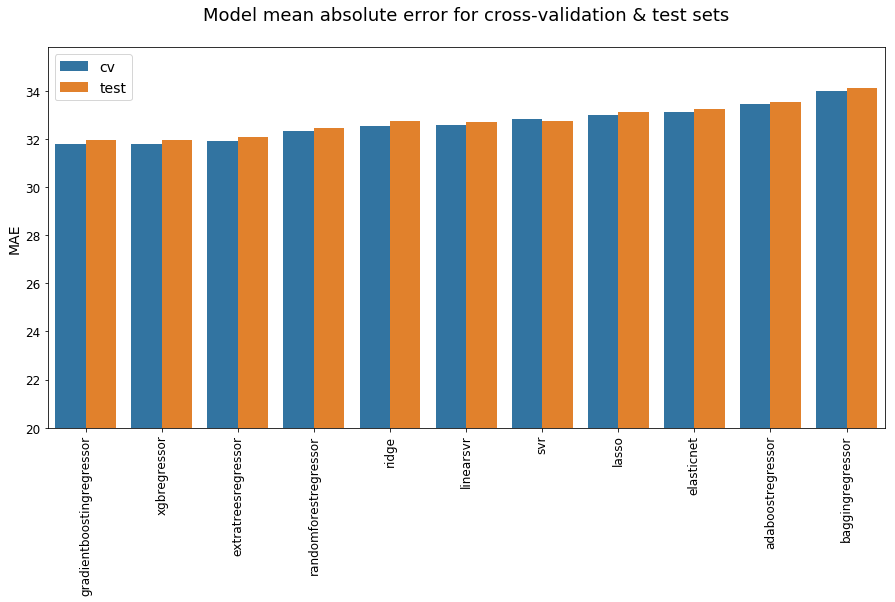

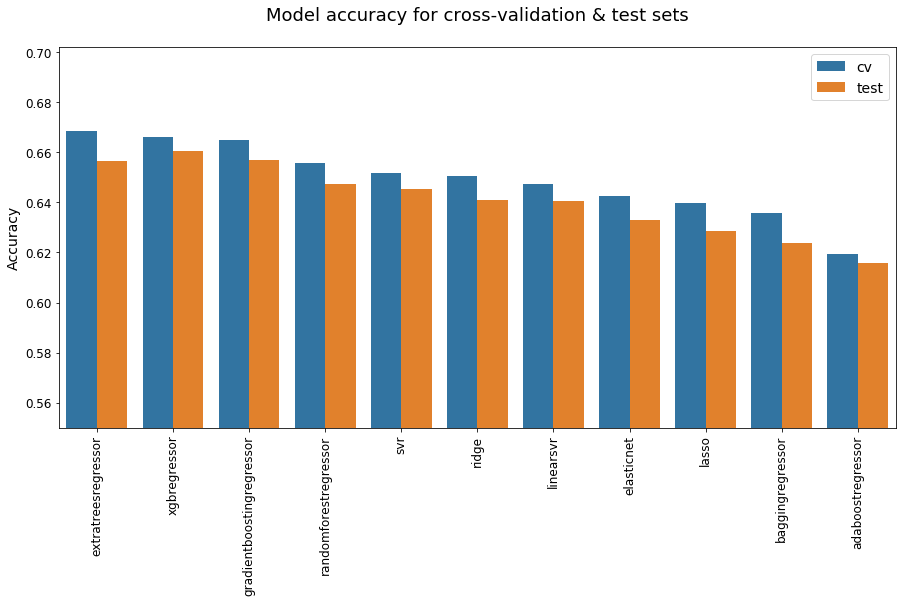

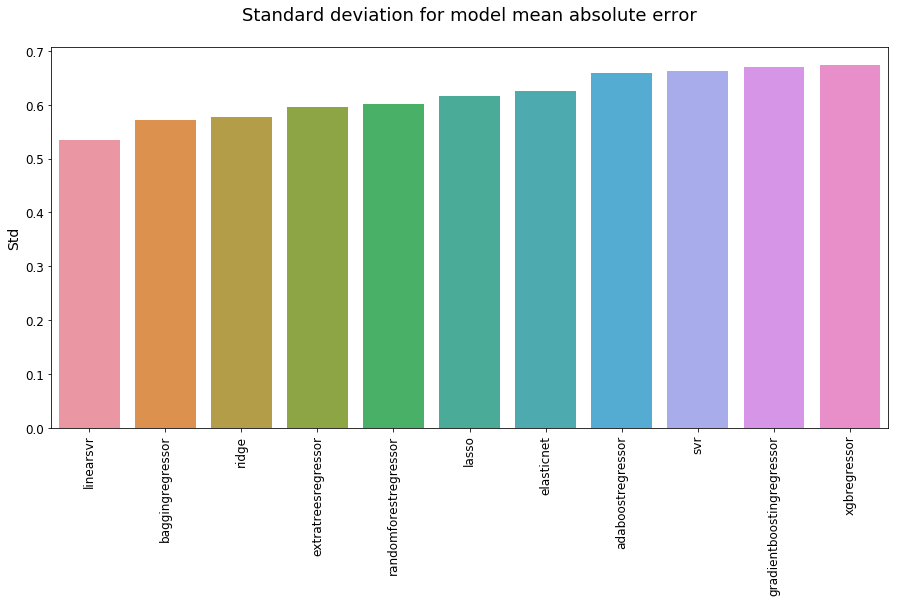

In [5]:
# MAE scores
mae_scores = estimator_scores.sort_values(['score_type', 'error'], ascending=[True, True])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='error', hue='score_type', data=mae_scores)
plt.ylim(bottom=20)
plt.title('Model mean absolute error for cross-validation & test sets\n', fontsize=18)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Accuracy scores
acc_scores = estimator_scores.sort_values(['score_type', 'accuracy'], ascending=[True, False])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='accuracy', hue='score_type', data=acc_scores)
plt.ylim(bottom=0.55)
plt.title('Model accuracy for cross-validation & test sets\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Std scores
std_scores = mae_scores[mae_scores['score_type'] == 'cv'].sort_values('std_error', ascending=True)

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='std_error', data=std_scores)
plt.title('Standard deviation for model mean absolute error\n', fontsize=18)
plt.ylabel('Std', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)

plt.show()

## Player Data + Opposition Player Data

In [6]:
PLAYER_STATS = [f'prev_match_{col}' for col in STATS_COLS if col != 'player_id']
INDEX_COLS = ['team', 'year', 'round_number']

def oppo_features(data_frame):
    oppo_col_names = {col_name: f'oppo_{col_name}' for col_name in PLAYER_STATS}
    column_translations = {**{'oppo_team': 'team'}, **oppo_col_names}

    return (data_frame
            .loc[:, ['year', 'round_number', 'oppo_team'] + PLAYER_STATS]
            # We switch out oppo_team for team in the index,
            # then assign feature as oppo_{feature_column}
            .rename(columns=column_translations)
            .set_index(INDEX_COLS)
            .sort_index()
            .loc[:, oppo_col_names.values()])

oppo_match_df = pd.concat([match_df, oppo_features(match_df)], axis=1)
oppo_match_df

team  year  round_number  \
team             year round_number                                         
Adelaide         1991 1                     Adelaide  1991             1   
                      2                     Adelaide  1991             2   
                      3                     Adelaide  1991             3   
                      4                     Adelaide  1991             4   
                      5                     Adelaide  1991             5   
                      6                     Adelaide  1991             6   
                      7                     Adelaide  1991             7   
                      9                     Adelaide  1991             9   
                      10                    Adelaide  1991            10   
                      11                    Adelaide  1991            11   
                      12                    Adelaide  1991            12   
                      13                    Adelaide  1991            13   
                      14                    Adelaide  1991            14   
                      15                    Adelaide  1991            15   
                      16                    Adelaide  1991            16   
                      17                    Adelaide  1991            17   
                      18                    Adelaide  1991            18   
                      19                    Adelaide  1991            19   
                      20                    Adelaide  1991            20   
                      21                    Adelaide  1991            21   
                      22                    Adelaide  1991            22   
                      24                    Adelaide  1991            24   
                 1992 1                     Adelaide  1992             1   
                      3                     Adelaide  1992             3   
                      4                     Adelaide  1992             4   
                      5                     Adelaide  1992             5   
                      6                     Adelaide  1992             6   
                      7                     Adelaide  1992             7   
                      8                     Adelaide  1992             8   
                      9                     Adelaide  1992             9   
...                                              ...   ...           ...   
Western Bulldogs 2015 21            Western Bulldogs  2015            21   
                      22            Western Bulldogs  2015            22   
                      23            Western Bulldogs  2015            23   
                      24            Western Bulldogs  2015            24   
                 2016 1             Western Bulldogs  2016             1   
                      2             Western Bulldogs  2016             2   
                      3             Western Bulldogs  2016             3   
                      4             Western Bulldogs  2016             4   
                      5             Western Bulldogs  2016             5   
                      6             Western Bulldogs  2016             6   
                      7             Western Bulldogs  2016             7   
                      8             Western Bulldogs  2016             8   
                      9             Western Bulldogs  2016             9   
                      10            Western Bulldogs  2016            10   
                      11            Western Bulldogs  2016            11   
                      12            Western Bulldogs  2016            12   
                      13            Western Bulldogs  2016            13   
                      15            Western Bulldogs  2016            15   
                      16            Western Bulldogs  2016            16   
                      17            Western Bulldogs  2016            17   
                    

In [7]:
# Set up & split data for models

oppo_match_features = pd.get_dummies(oppo_match_df.drop(['score', 'oppo_score'], axis=1)).astype(float)
oppo_match_labels = pd.Series(oppo_match_df['score'] - oppo_match_df['oppo_score'], name='score_diff')
oppo_data = train_test_split(oppo_match_features, oppo_match_labels)

In [8]:
# Pass data to models & measure performance

oppo_estimator_scores = measure_estimators(pipelines, oppo_data, model_type='regression')
oppo_estimator_scores

Training lasso
lasso done
Training elasticnet
elasticnet done
Training ridge
ridge done
Training linearsvr
linearsvr done
Training adaboostregressor
adaboostregressor done
Training baggingregressor
baggingregressor done
Training extratreesregressor
extratreesregressor done
Training gradientboostingregressor
gradientboostingregressor done
Training randomforestregressor
randomforestregressor done
Training svr
svr done
Training xgbregressor
xgbregressor done


,estimator,accuracy,error,std_accuracy,std_error,score_type
0,lasso,0.672782,31.622996,0.009450,0.262681,cv
1,elasticnet,0.672861,31.866139,0.007202,0.257156,cv
2,ridge,0.679029,30.945726,0.008406,0.129055,cv
3,linearsvr,0.679820,30.983743,0.009609,0.123556,cv
4,adaboostregressor,0.656571,32.206678,0.010439,0.255902,cv
5,baggingregressor,0.652776,32.788714,0.012639,0.360394,cv
6,extratreesregressor,0.681401,31.058688,0.008828,0.218696,cv
7,gradientboostingregressor,0.683615,30.989250,0.008042,0.175258,cv
8,randomforestregressor,0.675391,31.245382,0.011445,0.244228,cv
9,svr,0.678950,32.102794,0.010131,0.189641,cv


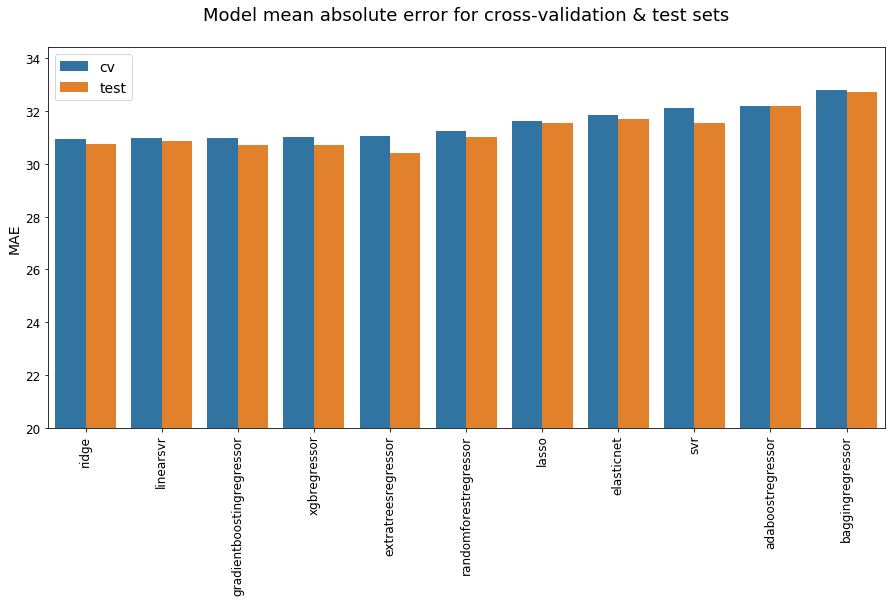

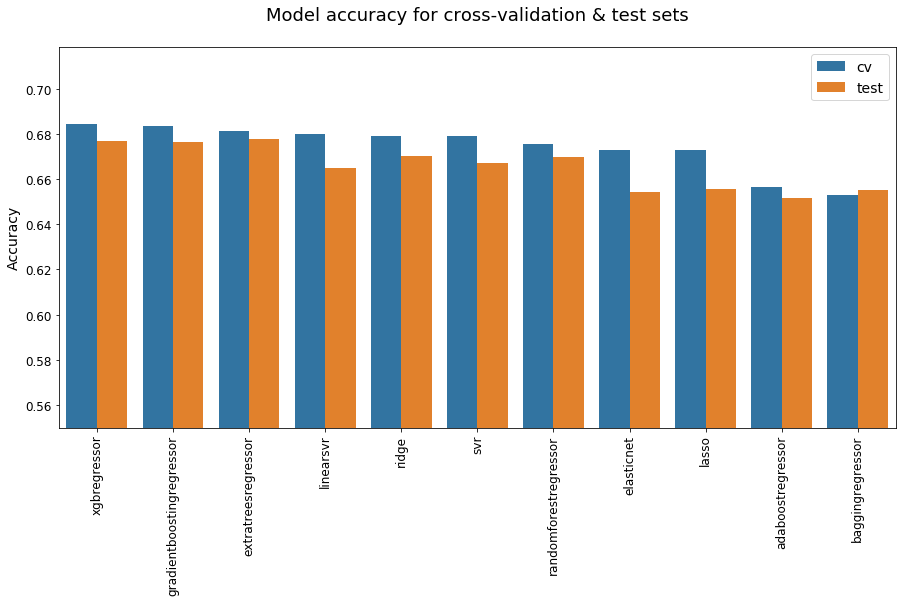

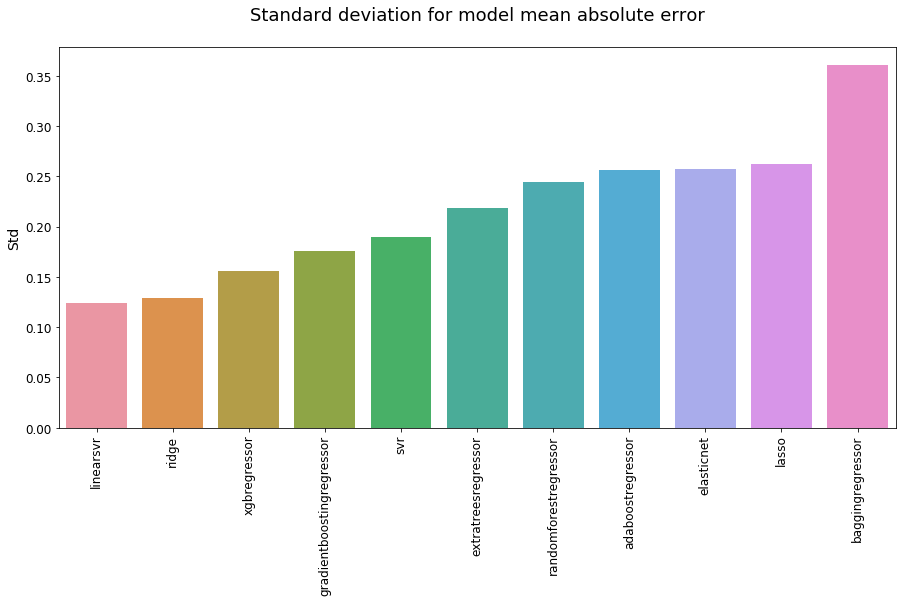

In [9]:
# MAE scores
oppo_mae_scores = oppo_estimator_scores.sort_values(['score_type', 'error'], ascending=[True, True])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='error', hue='score_type', data=oppo_mae_scores)
plt.ylim(bottom=20)
plt.title('Model mean absolute error for cross-validation & test sets\n', fontsize=18)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Accuracy scores
oppo_acc_scores = oppo_estimator_scores.sort_values(['score_type', 'accuracy'], ascending=[True, False])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='accuracy', hue='score_type', data=oppo_acc_scores)
plt.ylim(bottom=0.55)
plt.title('Model accuracy for cross-validation & test sets\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Std scores
oppo_std_scores = oppo_mae_scores[oppo_mae_scores['score_type'] == 'cv'].sort_values('std_error', ascending=True)

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='std_error', data=oppo_std_scores)
plt.title('Standard deviation for model mean absolute error\n', fontsize=18)
plt.ylabel('Std', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)

plt.show()

### Adding oppo data definitely improves performance

In [18]:
xgb = make_pipeline(StandardScaler(), XGBRegressor())
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())
ridge = make_pipeline(StandardScaler(), Ridge())
lsvr = make_pipeline(StandardScaler(), LinearSVR())
xtr = make_pipeline(StandardScaler(), ExtraTreesRegressor(n_estimators=100))

estimators = (xgb, gbr, ridge, lsvr, xtr)

model_names = []
errors = []
accuracies = []
years = []

for year in range(2011, 2017):
    X_train = oppo_match_features[match_features['year'] < year]
    X_test = oppo_match_features[match_features['year'] == year]
    y_train = oppo_match_labels.loc[X_train.index]
    y_test = oppo_match_labels.loc[X_test.index]
    
    for estimator in estimators:
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)

        years.append(year)
        model_names.append(estimator.steps[-1][0])
        errors.append(mean_absolute_error(y_test, y_pred))
        accuracies.append(regression_accuracy(y_test, y_pred))
        
year_scores = pd.DataFrame({'model': model_names,
                            'year': years,
                            'error': errors,
                            'accuracy': accuracies}).astype({'year': int})
year_scores

,model,year,error,accuracy
0,xgbregressor,2011,32.523136,0.742347
1,gradientboostingregressor,2011,32.449027,0.755102
2,ridge,2011,29.954680,0.778061
3,linearsvr,2011,30.722802,0.765306
4,extratreesregressor,2011,33.390281,0.724490
5,xgbregressor,2012,30.010793,0.756039
6,gradientboostingregressor,2012,30.051473,0.760870
7,ridge,2012,29.665035,0.763285
8,linearsvr,2012,30.181419,0.756039
9,extratreesregressor,2012,31.413237,0.743961


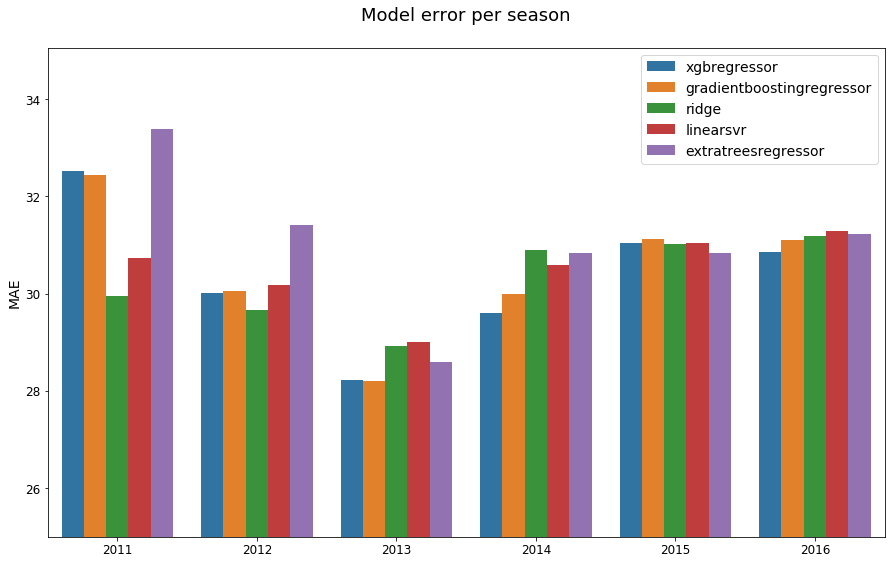

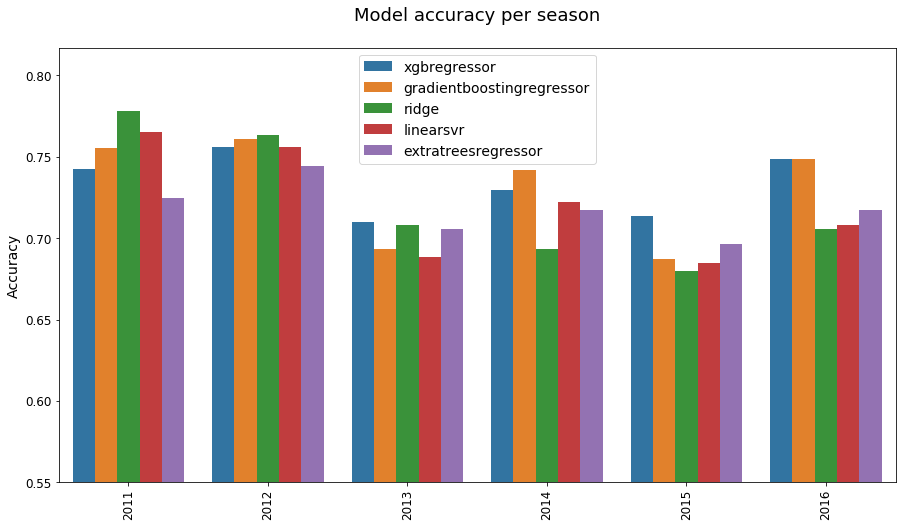

In [19]:
# MAE scores
plt.figure(figsize=(15, 9))
sns.barplot(x='year', y='error', hue='model', data=year_scores)
# Not starting axis at 0 to make small relative differences clearer
plt.ylim(bottom=25)
plt.title('Model error per season\n', fontsize=18)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=14)

plt.show()

# Accuracy scores
plt.figure(figsize=(15, 8))
sns.barplot(x='year', y='accuracy', hue='model', data=year_scores)
# Not starting axis at 0 to make small relative differences clearer
plt.ylim(bottom=0.55)
plt.title('Model accuracy per season\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

### Despite a bad 2011, XGB has the best performance, but there's not much separating the different models

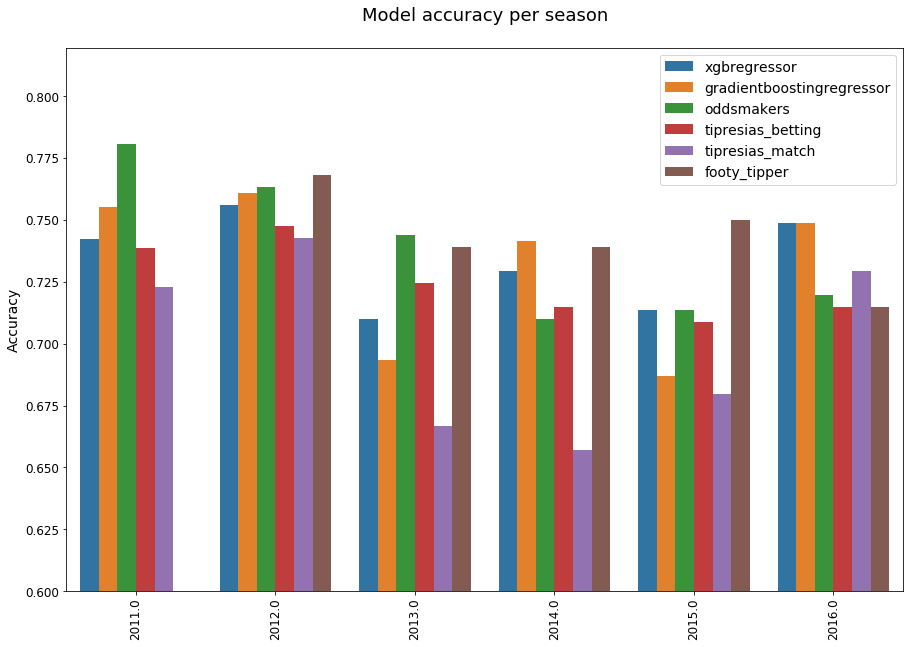

In [21]:
prediction_df = pd.read_csv('../data/model_predictions.csv')
prediction_scores = (prediction_df[prediction_df['model'] != 'tipresias_player']
                     .groupby(['model', 'year'])
                     .mean()['tip_point']
                     .reset_index()
                     .rename(columns={'tip_point': 'accuracy'}))
# Footy tipper accuracy scores taken from a trial that took too long to run,
# so I'm just copy pasting from a notebook
footy_tipper_scores = pd.DataFrame({'model': ['footy_tipper'] * len(range(2012, 2017)),
                                    'year': list(range(2012, 2017)),
                                    'error': [0] * len(range(2012, 2017)),
                                    'accuracy': [0.768116, 0.739130, 0.739130, 0.750000, 0.714976]})

all_year_scores = (pd
                   .concat([year_scores[(year_scores['model'] == 'gradientboostingregressor') | (year_scores['model'] == 'xgbregressor')],
                            prediction_scores, footy_tipper_scores],
                           sort=True)
                   .reset_index(drop=True))

# Accuracy scores
plt.figure(figsize=(15, 10))
sns.barplot(x='year', y='accuracy', hue='model', data=all_year_scores[all_year_scores['year'] > 2010])
# Not starting axis at 0 to make small relative differences clearer
plt.ylim(bottom=0.6)
plt.title('Model accuracy per season\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()